In [ ]:
!pip install perceval-quandela

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.3/439.3 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 3.6 MB/s eta 0:00:00


In [ ]:
delta1 = np.pi/4
xsi1 = 0

NameError: name 'np' is not defined

In [ ]:
mzi = (pcvl.Circuit(4)
       .add(1, comp.WP(delta=delta1, xsi=xsi1))
       .add(1, comp.BS.H()))
pcvl.pdisplay(mzi)

NameError: name 'pcvl' is not defined

In [ ]:
import perceval as pcvl
import perceval.components as comp

from perceval.components import PS, BS, PERM, Port
import numpy as np

from perceval.rendering.circuit import DisplayConfig, SymbSkin, PhysSkin
from perceval.utils import Encoding


In [ ]:
delta1 = pcvl.Parameter("delta1")
xsi1 = pcvl.Parameter("xsi1")

delta2 = pcvl.Parameter("delta2")
xsi2 = pcvl.Parameter("xsi2")

delta3 = pcvl.Parameter("delta3")
xsi3 = pcvl.Parameter("xsi3")

phi1 = pcvl.Parameter("phi1")

In [ ]:
# Function to generate a random phase shift within a realistic noise range
def random_phase_shift():
    return np.random.uniform(0, np.pi/6)  # Adjust this range as needed


In [ ]:
mzi = (pcvl.Circuit(4)

       .add(1, comp.BS().H())

       .add(0, comp.PS(random_phase_shift()))
       .add(1, comp.PS(random_phase_shift()))
       .add(2, comp.PS(random_phase_shift()))
       .add(3, comp.PS(random_phase_shift()))

       .add(1, comp.WP(delta=delta1, xsi=xsi1)) # oracle marking
       .add(1, comp.WP(delta=delta1, xsi=xsi1)) # oracle marking

       .add(1, comp.BS().H())
       .add(0, comp.PBS())
       .add(2, comp.PBS())

       .add(1, comp.WP(delta=delta1, xsi=xsi1))
       .add(2, comp.WP(delta=delta1, xsi=xsi1))

       .add(1, comp.PS(np.pi))
       .add(2, comp.PS(np.pi))

       .add(1, comp.BS().H())
       .add(0, comp.PBS())
       .add(2, comp.PBS())

       .add(1, comp.WP(delta=delta1, xsi=xsi1))
       .add(2, comp.WP(delta=delta1, xsi=xsi1)))



In [ ]:
mzi = (pcvl.Circuit(4)
       .add(1, comp.BS().H())

       .add(1, comp.WP(delta=delta1, xsi=xsi1)) # h gate
       .add(2, comp.WP(delta=delta2, xsi=xsi2)) # x gate followed by h gate
       .add(2, comp.WP(delta=delta1, xsi=xsi1)) # h gate

       .add(1, comp.BS().H())

       .add(0, comp.PBS())
       .add(2, comp.PBS()))



In [ ]:
mzi = (pcvl.Circuit(4)
       .add(1, comp.BS().H())

       .add(1, comp.WP(delta=delta1, xsi=xsi1)) # h gate
       .add(2, comp.PS(np.pi)) # z gate followed by h gate
       .add(2, comp.WP(delta=delta1, xsi=xsi1)) # h gate

       .add(1, comp.BS().H())

       .add(0, comp.PBS())
       .add(2, comp.PBS()))



In [ ]:
mzi = (pcvl.Circuit(4)
      #.add(1, comp.BS().H())
      .add(2, comp.WP(delta=delta2, xsi=xsi2))
      #.add(2, comp.PS(phi=phi1))
      #.add(2, comp.PR(delta=delta1))
      )

In [ ]:
mzi = (pcvl.Circuit(4)
       #.add(1, comp.BS().H())

       .add(1, comp.BS().H())

       .add(0, comp.PBS())
       .add(2, comp.PBS()))

In [ ]:
mzi = (pcvl.Circuit(4)
       .add(1, comp.BS().H()))

In [ ]:
delta1.set_value(np.pi/2)
xsi1.set_value(np.pi/8)

delta2.set_value(np.pi/2)
xsi2.set_value(np.pi/4)

#xsi2.set_value(np.pi/4)

delta3.set_value(np.pi/2)
xsi3.set_value(0)

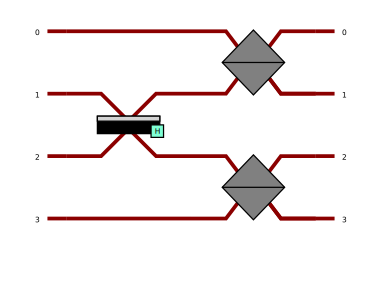

In [ ]:
pcvl.pdisplay(mzi, skin=PhysSkin())


In [ ]:
pcvl.pdisplay(mzi.U)

<IPython.core.display.Math object>

In [ ]:
processor = pcvl.Processor("SLOS", mzi)
processor.add_port(0, Port(Encoding.DUAL_RAIL, 'port1'))
processor.add_port(2, Port(Encoding.DUAL_RAIL, 'port2'))

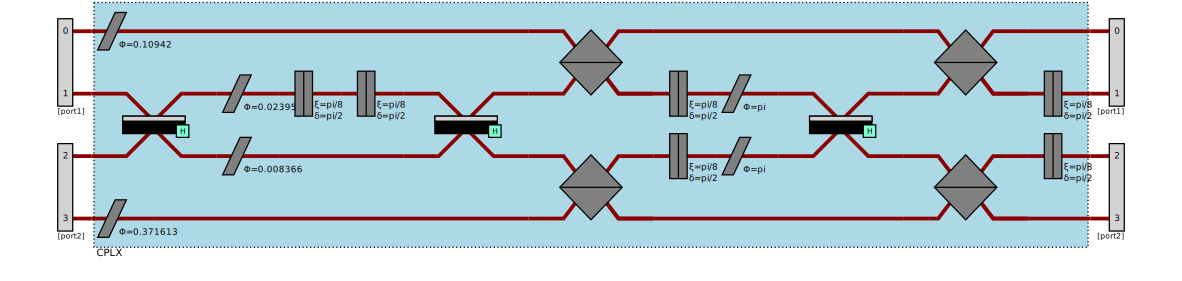

In [ ]:
pcvl.pdisplay(processor, recursive=True)

In [ ]:
input_state = pcvl.BasicState("|0,1,0,0>")
processor.with_input(input_state)
sampler = pcvl.algorithm.Sampler(processor)
sample_count = sampler.sample_count(10000)

In [ ]:
print(sample_count['results'])

{
  |0,1,0,0>: 94
  |0,0,1,0>: 9906
}


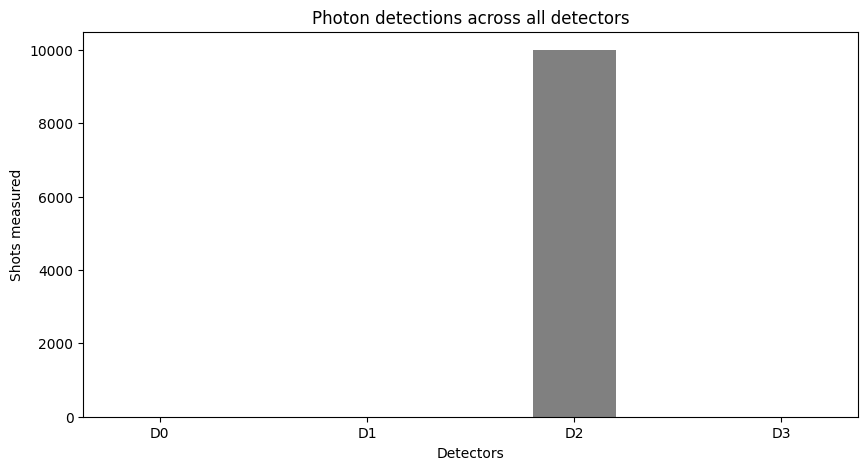

In [ ]:
import matplotlib.pyplot as plt

sample_count['results'] = {
    "|1,0,0,0>": 0,
    "|0,1,0,0>":0,
    "|0,0,1,0>":10000,
    "|0,0,0,01>":0
}
detectors = ["D0", "D1", "D2", "D3"]
values = list(sample_count['results'].values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(detectors, values, color ='gray',
        width = 0.4)

plt.xlabel("Detectors")
plt.ylabel("Shots measured")
plt.title("Photon detections across all detectors")
plt.show()

In [ ]:
from perceval.components import catalog
from perceval.components.source import Source
from perceval.algorithm import ProcessTomography
from perceval.algorithm.tomography import is_physical

In [ ]:
mzi = (pcvl.Circuit(4)
       .add(1, comp.WP(delta=delta1, xsi=xsi1))
       .add(1, comp.BS.H())
       .add(2, comp.WP(delta=delta1, xsi=xsi1))
       .add(2, comp.WP(delta=delta2, xsi=xsi2))
       .add(1, comp.BS().H())
       .add(0, comp.PBS())
       .add(2, comp.PBS()))

In [ ]:
#angles = [0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi, 5*np.pi/4, 3*np.pi/2, 7*np.pi/4, 2*np.pi]
devs = []
angles_to_test = np.linspace(0, 2*np.pi, 100)
#angles: list[list[float]] = []
for angle in angles_to_test:
  delta1.set_value(np.pi/2)
  xsi1.set_value(0)

  delta2.set_value(np.pi/2)
  xsi2.set_value(angle)

  processor = pcvl.Processor("SLOS", mzi)
  processor.add_port(0, Port(Encoding.DUAL_RAIL, 'port1'))
  processor.add_port(2, Port(Encoding.DUAL_RAIL, 'port2'))

  input_state = pcvl.BasicState("|0,1,0,0>")
  processor.with_input(input_state)
  sampler = pcvl.algorithm.Sampler(processor)
  sample_count = sampler.sample_count(10000)

  print(str(angle) + str(sample_count['results']))

  vals = list(sample_count['results'].values())
  deviation = 0
  for v in vals:
    deviation += abs(2500 - v)
  devs.append(deviation)
print(devs)



0.0{
  |1,0,0,0>: 10000
}
0.06346651825433926{
  |1,0,0,0>: 9931
  |0,1,0,0>: 26
  |0,0,1,0>: 42
  |0,0,0,1>: 1
}
0.12693303650867852{
  |1,0,0,0>: 9695
  |0,1,0,0>: 157
  |0,0,1,0>: 146
  |0,0,0,1>: 2
}
0.1903995547630178{
  |1,0,0,0>: 9283
  |0,1,0,0>: 365
  |0,0,1,0>: 338
  |0,0,0,1>: 14
}
0.25386607301735703{
  |1,0,0,0>: 8832
  |0,1,0,0>: 583
  |0,0,1,0>: 551
  |0,0,0,1>: 34
}
0.3173325912716963{
  |1,0,0,0>: 8110
  |0,1,0,0>: 932
  |0,0,1,0>: 859
  |0,0,0,1>: 99
}
0.3807991095260356{
  |1,0,0,0>: 7435
  |0,1,0,0>: 1201
  |0,0,1,0>: 1205
  |0,0,0,1>: 159
}
0.4442656277803748{
  |1,0,0,0>: 6706
  |0,1,0,0>: 1470
  |0,0,1,0>: 1478
  |0,0,0,1>: 346
}
0.5077321460347141{
  |1,0,0,0>: 5939
  |0,1,0,0>: 1751
  |0,0,1,0>: 1785
  |0,0,0,1>: 525
}
0.5711986642890533{
  |1,0,0,0>: 5070
  |0,1,0,0>: 2029
  |0,0,1,0>: 2015
  |0,0,0,1>: 886
}
0.6346651825433925{
  |1,0,0,0>: 4224
  |0,1,0,0>: 2306
  |0,0,1,0>: 2200
  |0,0,0,1>: 1270
}
0.6981317007977318{
  |1,0,0,0>: 3479
  |0,1,0,0>: 2411
  |

In [ ]:
#angles = [0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi, 5*np.pi/4, 3*np.pi/2, 7*np.pi/4, 2*np.pi]
devs = []
angles_to_test = np.linspace(0, 2*np.pi, 100)
#angles: list[list[float]] = []
for angle in angles_to_test:
  delta1.set_value(np.pi/2)
  xsi1.set_value(np.pi/8)

  delta2.set_value(np.pi/2)
  xsi2.set_value(angle)

  processor = pcvl.Processor("SLOS", mzi)
  processor.add_port(0, Port(Encoding.DUAL_RAIL, 'port1'))
  processor.add_port(2, Port(Encoding.DUAL_RAIL, 'port2'))

  input_state = pcvl.BasicState("|0,1,0,0>")
  processor.with_input(input_state)
  sampler = pcvl.algorithm.Sampler(processor)
  sample_count = sampler.sample_count(10000)

  print(str(angle) + ": " + str(sample_count['results']))

  vals = list(sample_count['results'].values())
  print(vals)
  deviation = 0
  # for v in vals:
  #   deviation += abs(2500 - v)
  # devs.append(deviation)
  if len(vals) == 4:
    for i in range(4):
      v = vals[i]
      if i == 0:
        deviation += abs(1275 - v)
      elif i == 1:
        deviation += abs(7250 - v)
      elif i == 2:
        deviation += abs(200 - v)
      else:
        deviation += abs(1275 - v)
    devs.append(deviation)

  if len(vals) == 3:
    for i in range(3):
      v = vals[i]
      if i == 0:
        deviation += abs(1275 - v)
      elif i == 1:
        deviation += abs(7250 - v)
      else:
        deviation += abs(200 - v)
    deviation += abs(1275 - 0)
    devs.append(deviation)

  if len(vals) == 2:
    for i in range(2):
      v = vals[i]
      if i == 0:
        deviation += abs(1275 - v)
      else:
        deviation += abs(7250 - v)
    deviation += abs(200 - 0)
    deviation += abs(1275 - 0)
    devs.append(deviation)
print(devs)



0.0: {
  |1,0,0,0>: 7272
  |0,1,0,0>: 1253
  |0,0,1,0>: 1230
  |0,0,0,1>: 245
}
[7272, 1253, 1230, 245]
0.06346651825433926: {
  |1,0,0,0>: 7155
  |0,1,0,0>: 1739
  |0,0,1,0>: 866
  |0,0,0,1>: 240
}
[7155, 1739, 866, 240]
0.12693303650867852: {
  |1,0,0,0>: 7017
  |0,1,0,0>: 2300
  |0,0,1,0>: 509
  |0,0,0,1>: 174
}
[7017, 2300, 509, 174]
0.1903995547630178: {
  |1,0,0,0>: 6715
  |0,1,0,0>: 2901
  |0,0,1,0>: 264
  |0,0,0,1>: 120
}
[6715, 2901, 264, 120]
0.25386607301735703: {
  |1,0,0,0>: 6290
  |0,1,0,0>: 3522
  |0,0,1,0>: 116
  |0,0,0,1>: 72
}
[6290, 3522, 116, 72]
0.3173325912716963: {
  |1,0,0,0>: 5740
  |0,1,0,0>: 4213
  |0,0,1,0>: 28
  |0,0,0,1>: 19
}
[5740, 4213, 28, 19]
0.3807991095260356: {
  |1,0,0,0>: 5141
  |0,1,0,0>: 4858
  |0,0,1,0>: 1
}
[5141, 4858, 1]
0.4442656277803748: {
  |1,0,0,0>: 4509
  |0,1,0,0>: 5466
  |0,0,1,0>: 12
  |0,0,0,1>: 13
}
[4509, 5466, 12, 13]
0.5077321460347141: {
  |1,0,0,0>: 3785
  |0,1,0,0>: 6072
  |0,0,1,0>: 56
  |0,0,0,1>: 87
}
[3785, 6072, 56, 8

100
100


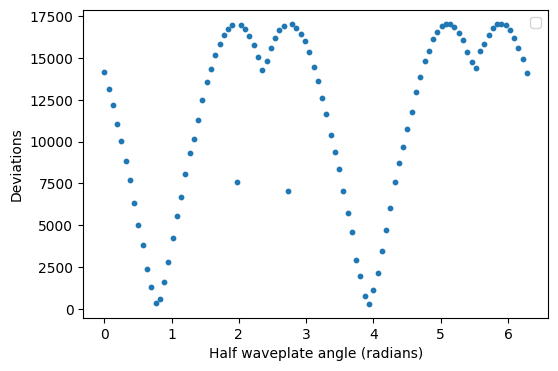

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

# Define data
#angles = [0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi, 5*np.pi/4, 3*np.pi/2, 7*np.pi/4, 2*np.pi]
#devs = [7044, 110, 7062, 60, 7152, 168, 7100, 108, 7004]

x = np.array(angles_to_test)
y = np.array(devs)

def test_func(x, a, b, c):
    return a * np.sin(b * x) + c

# Initial guess for the parameters: [amplitude, frequency, offset]
initial_guess = [3600, 1, 3600]

# Fit the curve
# params, params_covariance = optimize.curve_fit(test_func, x, y, p0=initial_guess)
# print("Fitted parameters:", params)

print(len(x))
print(len(y))

# Create the plot
plt.figure(figsize=(6, 4))
plt.scatter(x, y, s=10)
#plt.plot(x, test_func(x, *params), label='Fitted function', color='red')

# Adding labels and title
plt.xlabel('Half waveplate angle (radians)')
plt.ylabel('Deviations')
#plt.title('Half waveplate angle deviations from expected photon counts')
plt.legend(loc='best')

plt.show()


In [ ]:
import time
import math
from pprint import pprint
from tqdm.notebook import tqdm

import perceval as pcvl
from perceval.algorithm import Sampler

In [ ]:
import numpy as np

# Import Qiskit
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_state_city
import qiskit.quantum_info as qi

ModuleNotFoundError: No module named 'qiskit_aer'

In [ ]:
!pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 33.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 25.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 3.2 MB/s eta 0:00:00


In [ ]:
circ = QuantumCircuit(2)
circ.x(0)

NameError: name 'QuantumCircuit' is not defined

In [ ]:
circ.draw()

┌───┐
q_0: ┤ X ├
     └───┘
q_1: ─────

In [ ]:
pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=35a62e8f49f2c91fc24274e9d57414d05fdd06615bfdb568103e3ad35f7a39d7
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc


In [ ]:
from qiskit.circuit import QuantumCircuit
from qiskit.primitives import Estimator, Sampler
from qiskit.quantum_info import SparsePauliOp
from qiskit.visualization import plot_histogram

import numpy as np
import matplotlib.pyplot as plt
#plt.style.use('light_background') # optional

In [ ]:
# Define Pauli operators
A = SparsePauliOp('IX')
a = SparsePauliOp('IZ')
B = SparsePauliOp('XI')
b = SparsePauliOp('ZI')

# Calculate CHSH witness operator
obsv = A.compose(B) - A.compose(b) + a.compose(B) + a.compose(b)

In [ ]:
from qiskit.circuit import Parameter

theta = Parameter('θ')

qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)

qc.cx(0,1)
# qc.x(0)
# qc.cz(0,1)
# qc.x(0)

qc.h(0)
qc.h(1)

qc.h(0) # contribution from PS
qc.z(0)
qc.h(1) # contribution from PS
qc.z(1)

qc.cx(0,1)
#qc.cz(0,1)

qc.h(0)
qc.h(1)

qc.rx(theta, 0) # to change the measurement basis from just X and Y, we want to do a rotation around the Bloch sphere


In [ ]:
angles_to_test = np.linspace(0, 2*np.pi, 21)
angles: list[list[float]] = []
for angle in angles_to_test:
    angles.append([angle])


In [ ]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

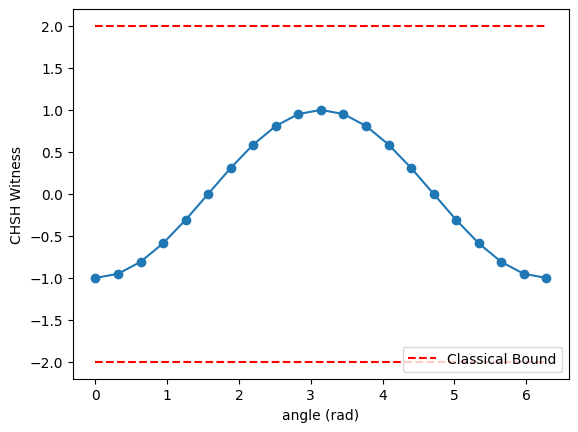

In [ ]:
estimator = Estimator()
job = estimator.run([qc]*len(angles), observables=[obsv]*len(angles), parameter_values=angles)
exps = job.result().values

ax = plt.axes()

# Setting the background color of the
# plot using set_facecolor() method
#plt.figure(facecolor='white')

plt.plot(angles, exps, marker='o', ls='-')
plt.plot(angles, [2]*len(angles), ls='--', color='red', label='Classical Bound')
plt.plot(angles, [-2]*len(angles), ls='--', color='red')
plt.xlabel('angle (rad)')
plt.ylabel('CHSH Witness')
plt.legend(loc=4)

In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit.providers.fake_provider import GenericBackendV2

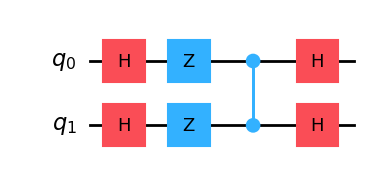

In [ ]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.z(0)
qc.z(1)
qc.cz(0,1)
qc.h(0)
qc.h(1)
qc.draw('mpl')
# backend = GenericBackendV2(num_qubits=3)

# # Transpile and run
# transpiled_circuit = transpile(qc, backend)
# result = backend.run(transpiled_circuit).result()

In [ ]:
print(result)

Result(backend_name='basic_simulator', backend_version='0.1', qobj_id='a2ade821-a868-4481-90e3-18cd1e05ce41', job_id='334dede6-4e2b-4d88-8c84-73a0bc5e7218', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={}), header=QobjExperimentHeader(qubit_labels=[['q', 0], ['q', 1], ['q', 2]], n_qubits=3, qreg_sizes=[['q', 3]], clbit_labels=[], memory_slots=0, creg_sizes=[], name='circuit-298', global_phase=0.0, metadata={}), status=DONE, name='circuit-298', seed_simulator=629241460, time_taken=0.0054607391357421875)], date=None, status=COMPLETED, header=QobjHeader(backend_name='basic_simulator', backend_version='0.1'), time_taken=0.0054814815521240234)


In [ ]:
counts = result.get_counts()

In [ ]:
counts

{}

In [ ]:
from qiskit_aer import AerSimulator

ModuleNotFoundError: No module named 'qiskit_aer'

In [ ]:
!pip install qiskit_aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 61.1 MB/s eta 0:00:00


In [ ]:
from qiskit_aer import AerSimulator

In [ ]:
from qiskit.quantum_info import Operator


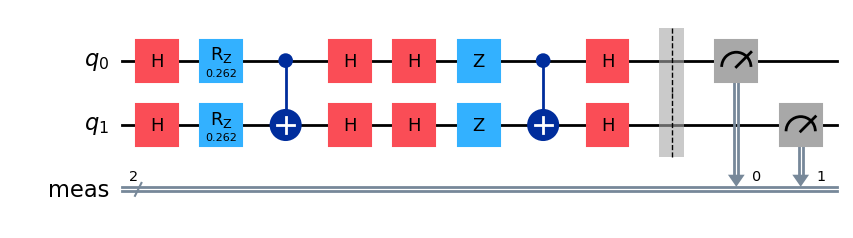

In [ ]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)

phase_noise = 0.262
qc.rz(phase_noise, 0)
qc.rz(phase_noise, 1)

qc.cx(0,1)
# qc.x(0)
# qc.cz(0,1)
# qc.x(0)

qc.h(0)
qc.h(1)

qc.h(0) # contribution from PS
qc.z(0)
qc.h(1) # contribution from PS
qc.z(1)

qc.cx(0,1)
#qc.cz(0,1)

qc.h(0)
qc.h(1)

qc.measure_all()
# qc.h(0)
# qc.z(1)
# #qc.h(1)
# #qc.h(1)
# qc.cx(0,1)
# qc.measure_all()

qc.draw('mpl')
#qc.draw()
#qc.save_statevector()

In [ ]:
qc_aer = transpile(qc, backend=AerSimulator())
simulator_aer = AerSimulator()
results = simulator_aer.run(qc_aer, shots=10000).result()
counts=results.get_counts()
print(counts)

{'01': 1, '11': 165, '00': 156, '10': 9678}


In [ ]:
U_BS = (1/np.sqrt(2)) * np.array([[1, 1],
                                  [1, -1]])
bs_gate = Operator(U_BS)

# Create a 2-qubit quantum circuit to represent the two paths (spatial modes)
qc = QuantumCircuit(2)

# Step 1: Apply the beamsplitter to create superposition of paths
qc.unitary(bs_gate, [0, 1], label='BS')

# Step 2: Apply Hadamard gates (or custom waveplate gates) to rotate polarization if needed
qc.h(0)  # Simulating a waveplate rotation on qubit 0
qc.x(1)  # Simulating a waveplate rotation on qubit 1

# Step 3: Apply a CNOT gate to entangle the polarization states of the paths
qc.cx(0, 1)

qc.measure_all()

# Display the circuit
print(qc.draw('mpl'))

Figure(663.998x284.278)


In [ ]:
qc_aer = transpile(qc, backend=AerSimulator())
simulator_aer = AerSimulator()
results = simulator_aer.run(qc_aer, shots=10000).result()
counts=results.get_counts()
print(counts)

{'00': 5009, '10': 4991}


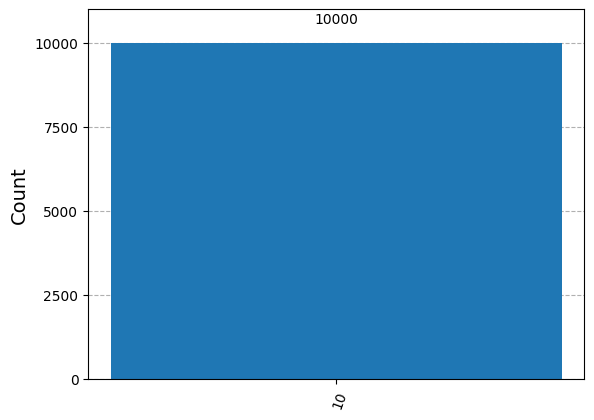

In [ ]:
from qiskit.visualization import plot_histogram

plot_histogram(counts)

In [ ]:
qc_aer = transpile(qc, backend=AerSimulator())
simulator_aer = AerSimulator()
results = simulator_aer.run(qc_aer, shots=1024).result()
counts=results.get_counts()

In [ ]:
counts

{'11': 1.0}

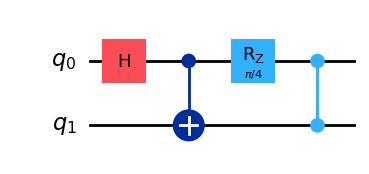

In [ ]:
# Define a custom subroutine for a black box operation
def black_box_subroutine(qc, q0, q1):
    qc.h(q0)  # Example operation (Hadamard)
    qc.cx(q0, q1)  # Example operation (CNOT)
    qc.rz(np.pi/4, q0)  # Example phase shift
    qc.cz(q0, q1)  # Controlled-Z gate as part of the black box

# Create a circuit and apply the subroutine
qc = QuantumCircuit(2)
black_box_subroutine(qc, 0, 1)

# Draw the circuit with the custom black box operations
qc.draw('mpl')


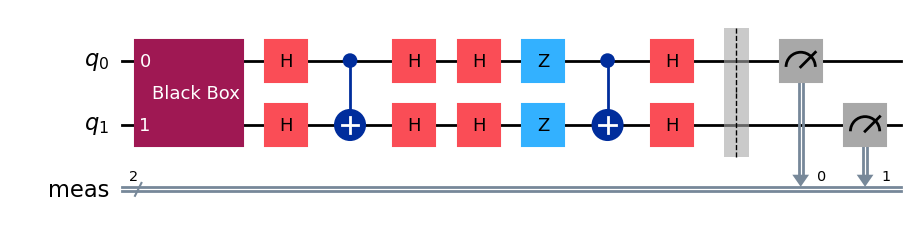

In [ ]:
from qiskit.circuit import Gate

# Create a black box circuit
black_box_circuit = QuantumCircuit(2)
black_box_subroutine(black_box_circuit, 0, 1)

# Convert to a gate
black_box_gate = black_box_circuit.to_gate(label='Black Box')

# Apply in a larger circuit
qc = QuantumCircuit(2)
qc.append(black_box_gate, [0, 1])
qc.h(0)
qc.h(1)

qc.cx(0,1)
# qc.x(0)
# qc.cz(0,1)
# qc.x(0)

qc.h(0)
qc.h(1)

qc.h(0) # contribution from PS
qc.z(0)
qc.h(1) # contribution from PS
qc.z(1)

qc.cx(0,1)
#qc.cz(0,1)

qc.h(0)
qc.h(1)
qc.measure_all()
qc.draw('mpl')


In [ ]:
state_vector = results.get_statevector()

In [ ]:
state_vector

Statevector([-0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j],
            dims=(2, 2))


In [ ]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.save_statevector()

In [ ]:
qc_aer = transpile(qc, backend=AerSimulator())
simulator_aer = AerSimulator()
results = simulator_aer.run(qc_aer, shots=1024).result()
state_vector = results.get_statevector()

In [ ]:
state_vector

Statevector([0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j],
            dims=(2, 2))


In [ ]:
qc.h(0)

qc.h(0)
qc.h(1)

qc.z(0)
qc.z(1)

qc.cz(0,1)

qc.h(0)
qc.h(1)

qc.save_statevector()

In [ ]:
qc_aer2 = transpile(qc, backend=AerSimulator())
simulator_aer2 = AerSimulator()
results = simulator_aer.run(qc_aer2, shots=1024).result()
state_vector = results.get_statevector()

ERROR: Failed to load circuits: Duplicate key "statevector" in save instruction.


QiskitError: 'You have to select a circuit or schedule when there is more than one available'

In [ ]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)

#qc.cz(0,1)

# qc.h(0)
# qc.h(1)
# qc.z(0)
# qc.z(1)
# qc.cz(0,1)
# qc.h(0)
# qc.h(1)
qc.save_statevector()

In [ ]:
qc_aer2 = transpile(qc, backend=AerSimulator())
simulator_aer2 = AerSimulator()
results = simulator_aer2.run(qc_aer2, shots=1024).result()
state_vector = results.get_statevector()
counts = results.get_counts()

In [ ]:
counts

{'00': 0.25, '01': 0.25, '10': 0.25, '11': 0.25}

In [ ]:
Statevector([0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j],
            dims=(2, 2))

Statevector([1.96261557e-16+1.23259516e-32j,
             2.22044605e-16-6.12323400e-17j,
             1.96261557e-16-6.12323400e-17j,
             1.00000000e+00+1.22464680e-16j],
            dims=(2, 2))


NameError: name 'Statevector' is not defined

In [ ]:
initial_amplitudes = [0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j]
final_amplitudes = [0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j]

average_amplitude = sum(initial_amplitudes) / len(initial_amplitudes)
print("Average Initial Amplitude:", average_amplitude)

# Compare initial and final amplitudes to check the flip
for i in range(len(initial_amplitudes)):
    flipped_amplitude = 2 * average_amplitude - initial_amplitudes[i]
    print(f"State |{i:02b}>: Initial = {initial_amplitudes[i]}, Expected Final = {flipped_amplitude}, Actual Final = {final_amplitudes[i]}")


Average Initial Amplitude: (0.5+0j)
State |00>: Initial = (0.5+0j), Expected Final = (0.5+0j), Actual Final = (0.5+0j)
State |01>: Initial = (0.5+0j), Expected Final = (0.5+0j), Actual Final = (0.5+0j)
State |10>: Initial = (0.5+0j), Expected Final = (0.5+0j), Actual Final = (0.5+0j)
State |11>: Initial = (0.5+0j), Expected Final = (0.5+0j), Actual Final = (0.5+0j)


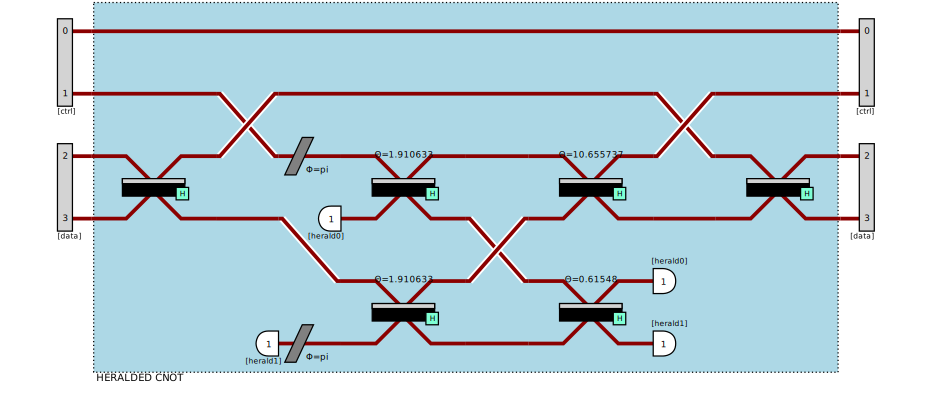

In [ ]:
import perceval as pcvl
import numpy as np
import matplotlib.pyplot as plt
from perceval.components import catalog, Processor, BS
from perceval.components.source import Source
from perceval.algorithm import ProcessTomography
from perceval.algorithm.tomography import is_physical, process_fidelity
from perceval.algorithm import ProcessTomographyMLE, StateTomographyMLE

cnot = catalog["heralded cnot"].build_processor()
pcvl.pdisplay(cnot, recursive=True)

In [ ]:
processor = pcvl.Processor("SLOS", mzi)
processor.add_port(0, Port(Encoding.DUAL_RAIL, 'port1'))
processor.add_port(2, Port(Encoding.DUAL_RAIL, 'port2'))

In [ ]:
input_state = pcvl.BasicState("|0,1,1,0>")
processor.with_input(input_state)
sampler = pcvl.algorithm.Sampler(processor)
sample_count = sampler.sample_count(10000)

In [ ]:
print(sample_count['results'])

{
  |0,1,1,0>: 10000
}


In [ ]:
|

In [ ]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)

qc.cx(0,1)
# qc.x(0)
# qc.cz(0,1)
# qc.x(0)

qc.h(0)
qc.h(1)

qc.h(0) # contribution from PS
qc.z(0)
qc.h(1) # contribution from PS
qc.z(1)

qc.cx(0,1)
#qc.cz(0,1)

qc.h(0)
qc.h(1)
qc.measure_all()

In [ ]:
def create_grovers_with_noise(phase_noise):
    # Initialize a 2-qubit circuit
    qc = QuantumCircuit(2, 2)

    # Add phase noise as a phase shift to each qubit
    qc.h(0)
    qc.h(1)

    qc.rz(phase_noise, 0)
    qc.rz(phase_noise, 1)

    qc.cx(0,1)
    # qc.x(0)
    # qc.cz(0,1)
    # qc.x(0)

    qc.h(0)
    qc.h(1)

    qc.h(0) # contribution from PS
    qc.z(0)
    qc.h(1) # contribution from PS
    qc.z(1)

    qc.cx(0,1)
    #qc.cz(0,1)

    qc.h(0)
    qc.h(1)

    # Measure the qubits
    qc.measure([0, 1], [0, 1])
    return qc

In [ ]:
def simulate_circuit_with_noise(phase_noise, shots=10000):
  qc = create_grovers_with_noise(phase_noise)
  qc_aer = transpile(qc, backend=AerSimulator())
  simulator_aer = AerSimulator()
  results = simulator_aer.run(qc_aer, shots=shots).result()
  counts=results.get_counts()
  return counts

In [ ]:
noise_levels = np.linspace(0, np.pi/6, 50)  # Noise levels from 0 to pi/6
results = []

for noise in noise_levels:
    counts = simulate_circuit_with_noise(phase_noise=noise)
    marked_count = counts.get('10', 0)
    accuracy = marked_count / 10000  # Normalize to get accuracy
    results.append((noise, accuracy))

# Prepare the data for ML training
X = np.array([x[0] for x in results]).reshape(-1, 1)  # Noise levels
y = np.array([x[1] for x in results])  # Accuracy

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Predict accuracy for a new noise level
new_noise_level = np.pi / 16
predicted_accuracy = model.predict([[new_noise_level]])
print(f"Predicted accuracy for noise level {new_noise_level:.3f}: {predicted_accuracy[0]:.3f}")


Mean Squared Error: 0.00010861377671559174
R-squared: 0.9211875452674467
Predicted accuracy for noise level 0.196: 0.971


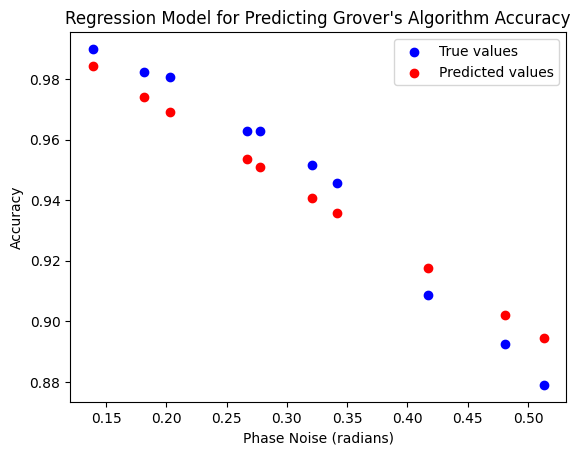

In [ ]:
import matplotlib.pyplot as plt

# Plot the true vs predicted values
plt.scatter(X_test, y_test, color='blue', label='True values')
plt.scatter(X_test, y_pred, color='red', label='Predicted values')
plt.xlabel('Phase Noise (radians)')
plt.ylabel('Accuracy')
plt.title('Regression Model for Predicting Grover\'s Algorithm Accuracy')
plt.legend()
plt.show()


In [ ]:
def create_grovers_with_noise(phase_noise):
  mzi = (pcvl.Circuit(4)
        .add(1, comp.BS().H())

        .add(0, comp.PS(phase_noise))
        .add(1, comp.PS(phase_noise))

        .add(1, comp.WP(delta=delta1, xsi=xsi1)) # oracle marking
        .add(1, comp.WP(delta=delta1, xsi=xsi1)) # oracle marking

        .add(1, comp.BS().H())
        .add(0, comp.PBS())
        .add(2, comp.PBS())

        .add(1, comp.WP(delta=delta1, xsi=xsi1))
        .add(2, comp.WP(delta=delta1, xsi=xsi1))

        .add(1, comp.PS(np.pi))
        .add(2, comp.PS(np.pi))

        .add(1, comp.BS().H())
        .add(0, comp.PBS())
        .add(2, comp.PBS())

        .add(1, comp.WP(delta=delta1, xsi=xsi1))
        .add(2, comp.WP(delta=delta1, xsi=xsi1)))
  return mzi


In [ ]:
def simulate_circuit_with_noise(phase_noise, shots=10000):
  mzi = create_grovers_with_noise(phase_noise)
  processor = pcvl.Processor("SLOS", mzi)
  processor.add_port(0, Port(Encoding.DUAL_RAIL, 'port1'))
  processor.add_port(2, Port(Encoding.DUAL_RAIL, 'port2'))
  input_state = pcvl.BasicState("|0,1,0,0>")
  processor.with_input(input_state)
  sampler = pcvl.algorithm.Sampler(processor)
  sample_count = sampler.sample_count(10000)
  counts = sample_count['results']
  return counts

In [ ]:
counts = simulate_circuit_with_noise(0.10942)
# print(list(dict(results).keys())[0])
# print(dict(results)['|0,0,1,0>'])
new_dict = {}
keys = ["|1,0,0,0>", "|0,1,0,0>", "|0,0,1,0>", "|0,0,0,1>"]
for i, key in enumerate(list(dict(counts).keys())):
  new_dict[str(key)] = list(dict(counts).values())[i]
print(new_dict)
print(new_dict["|0,0,1,0>"])

{'|0,1,0,0>': 21, '|0,0,1,0>': 9979}
9979


In [ ]:
noise_levels = np.linspace(0, np.pi/6, 50)  # Noise levels from 0 to pi/6
results = []

for noise in noise_levels:
    counts = simulate_circuit_with_noise(phase_noise=noise)
    new_dict = {}
    for i, key in enumerate(list(dict(counts).keys())):
      new_dict[str(key)] = list(dict(counts).values())[i]

    marked_count = new_dict.get('|0,0,1,0>', 0)
    accuracy = marked_count / 10000  # Normalize to get accuracy
    results.append((noise, accuracy))

# Prepare the data for ML training
X = np.array([x[0] for x in results]).reshape(-1, 1)  # Noise levels
y = np.array([x[1] for x in results])  # Accuracy

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Predict accuracy for a new noise level
new_noise_level = np.pi / 16
predicted_accuracy = model.predict([[new_noise_level]])
print(f"Predicted accuracy for noise level {new_noise_level:.3f}: {predicted_accuracy[0]:.3f}")


Mean Squared Error: 3.695181926295046e-05
R-squared: 0.9036208370543324
Predicted accuracy for noise level 0.196: 0.985


In [ ]:
params = list(np.random.uniform(0, np.pi, size=400))  # 20 qubits

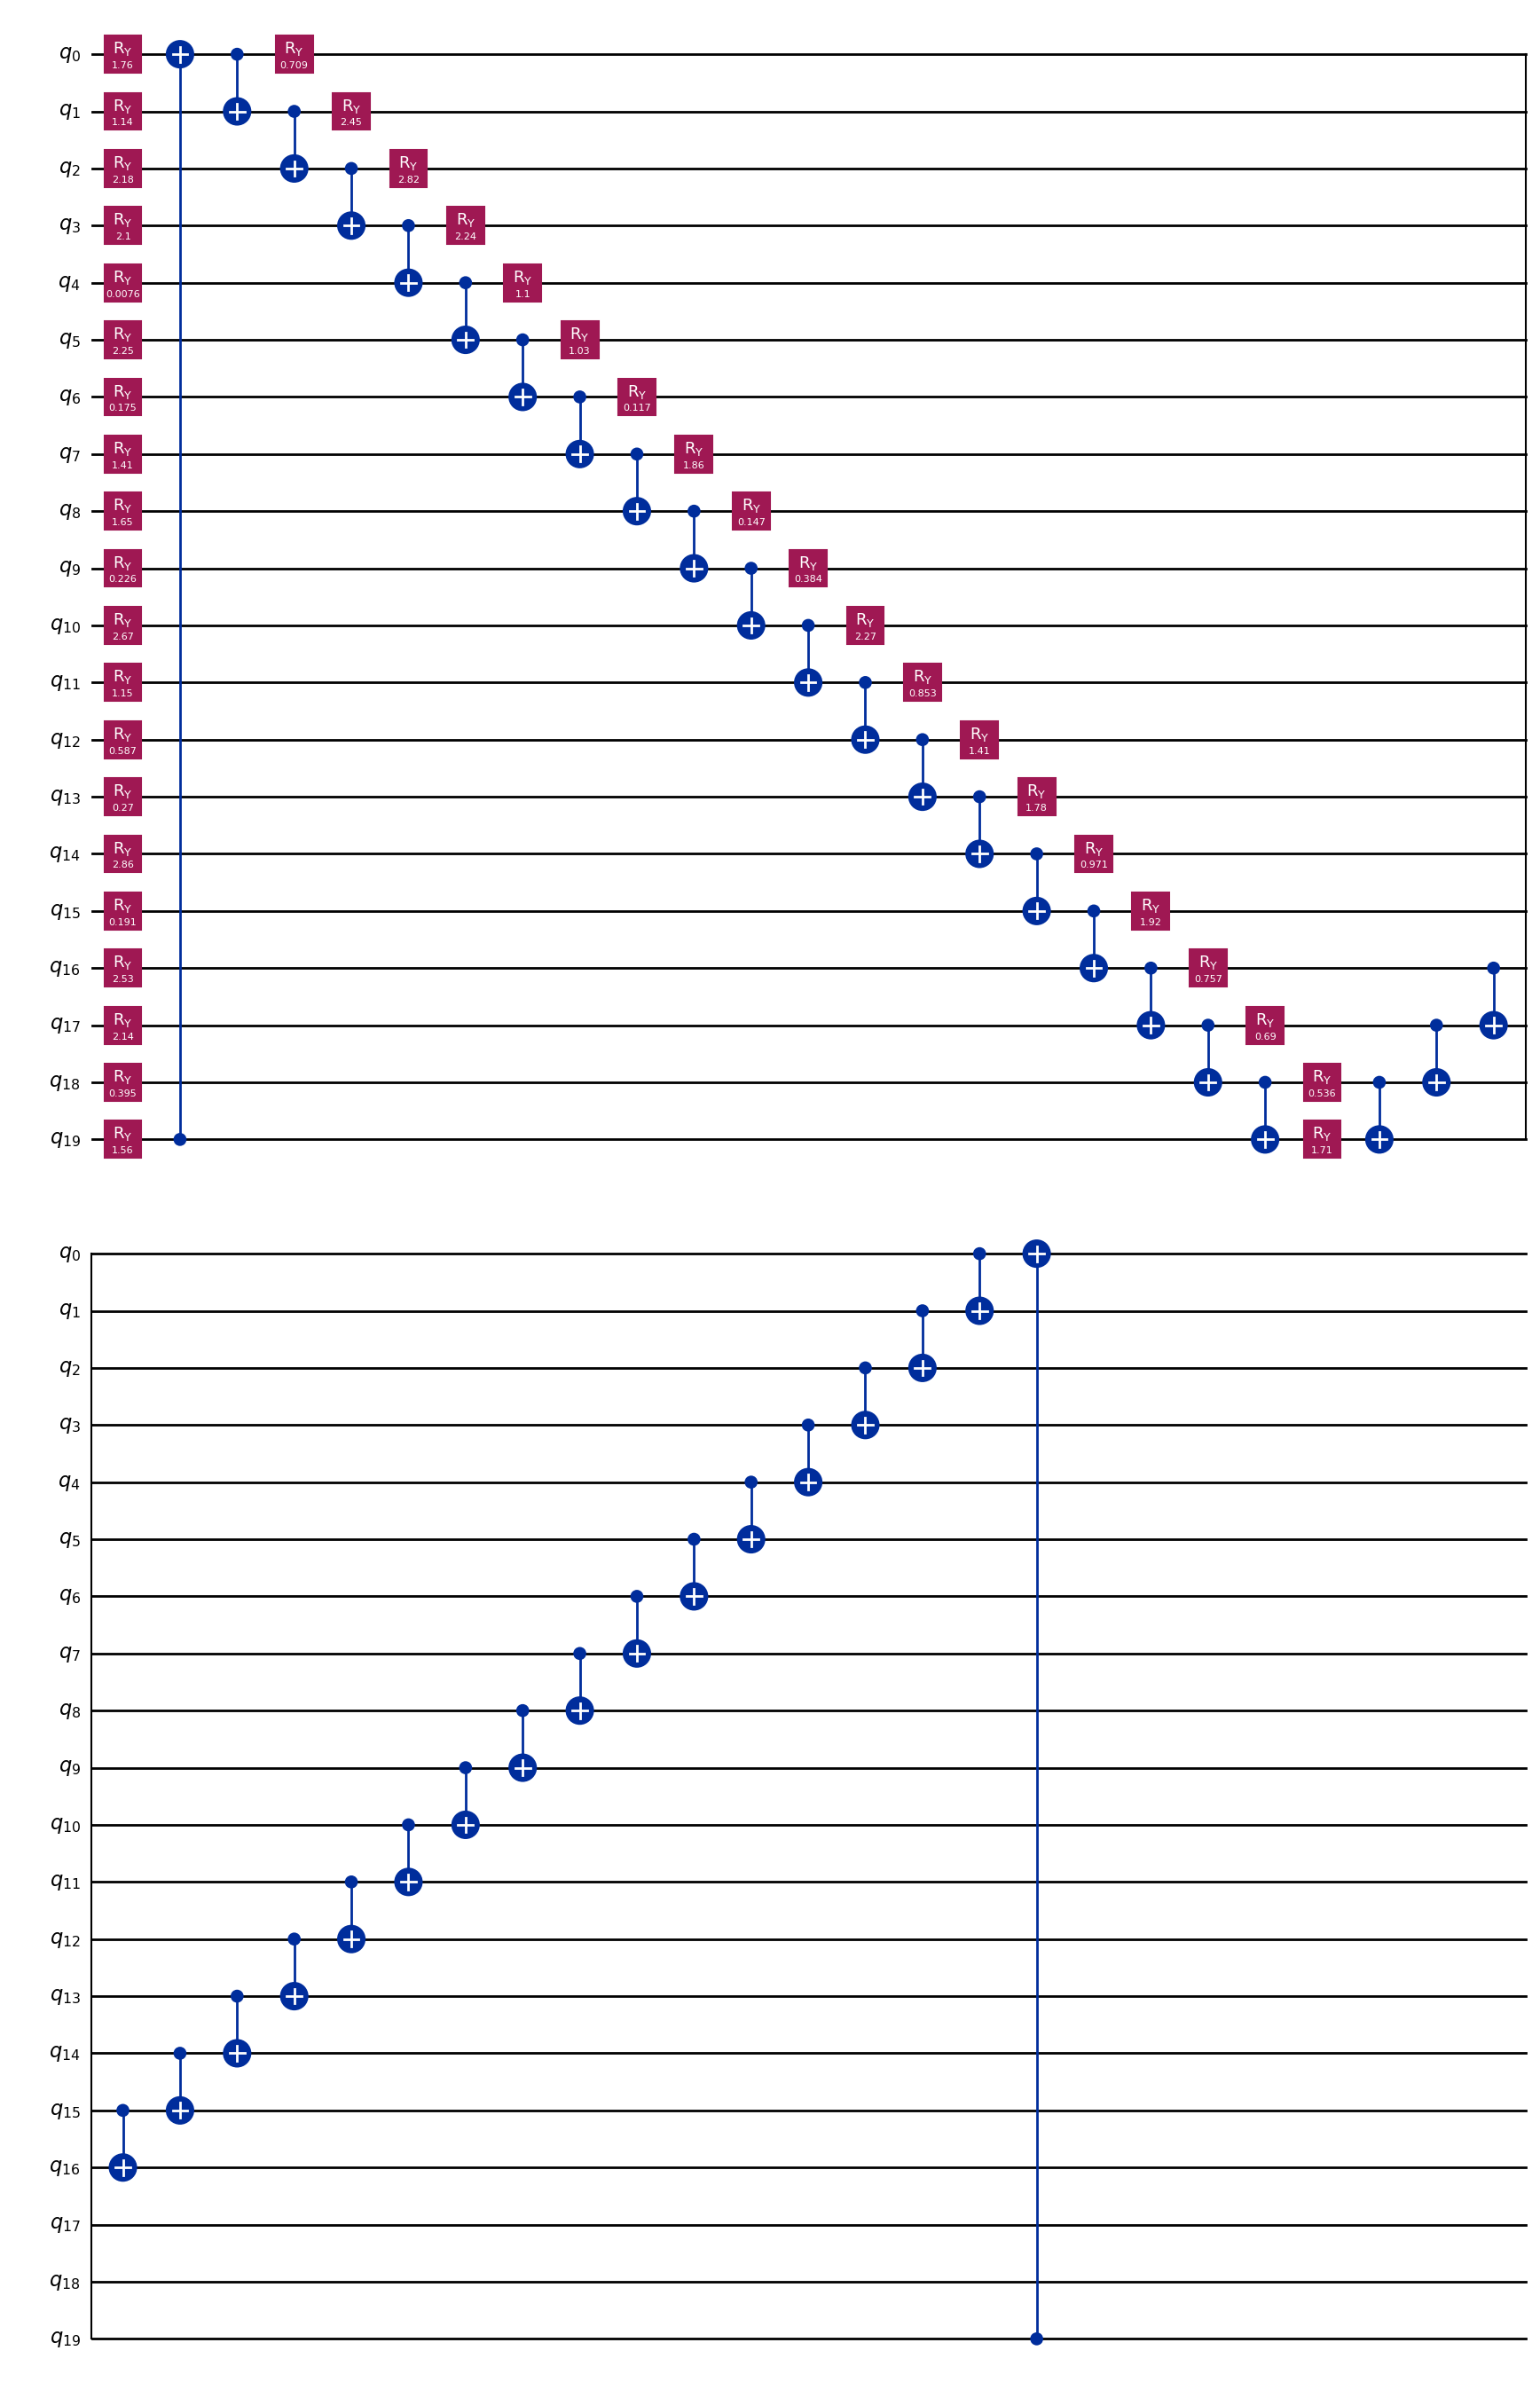

In [ ]:
# First Layer of RY gates
qc = QuantumCircuit(20)
num_qubits = 20

for qubit in range(num_qubits):
    qc.ry(params[qubit], qubit)

qc.cx(19, 0)

for qubit in range(num_qubits - 1):
    qc.cx(qubit, qubit + 1)

for qubit in range(num_qubits):
    qc.ry(params[num_qubits + qubit], qubit)


for qubit in reversed(range(num_qubits)):
    qc.cx(qubit - 1, qubit)

# qc.measure_all()

# Print the circuit
qc.draw('mpl')

In [ ]:
#for row in big_list:
  # Given list of 372 elements (example values from 1 to 372)
elements = [2, 2, 2, 1, 2, 2, 0, 0, 0, 0, 0, 2]

# Initialize a 20x20 matrix filled with -1
matrix = np.full((4, 4), -1)

# Fill the matrix with the given elements
matrix.flat[:len(elements)] = elements

# Convert to a list of lists
grid = matrix.tolist()

# Print the matrix (optional)
for row in grid:
    print(row)

[2, 2, 2, 1]
[2, 2, 0, 0]
[0, 0, 0, 2]
[-1, -1, -1, -1]


In [ ]:
def get_theta(n):
  return (n+1) * np.pi/3

In [ ]:
dim = 4
qc = QuantumCircuit(dim)

for i in range(dim):
  for j in range(dim):
    theta = get_theta(grid[i][j])
    if j == 0:
      qc.h(i)
    if grid[i][j] == -1:
      qc.id(i)
    elif j % 2 == 0:
      qc.rx(theta, i)
    elif j % 2 == 1:
      qc.rz(theta, i)

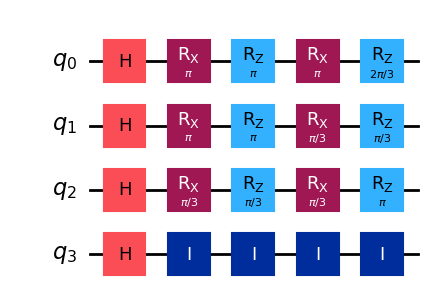

In [ ]:
qc.draw('mpl')